		HAC-T		|		DBSCAN
size	time	nclust	ndist	|	time	nclust	ndist
1K	0.2119	82	300909	|	0.8139	82	1046895
2K	0.6231	163	900364	|	3.4345	163	4187002
3K	1.2171	230	1705648	|	7.3685	231	9257878
4K	1.8754	285	2717129	|	13.6456	285	16694273
5K	2.7707	335	3921455	|	20.6999	336	25877733
6K	3.8819	390	5447225	|	29.3395	391	37019158


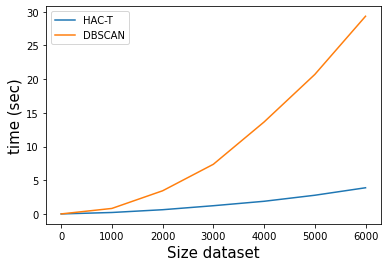

In [1]:
from pylib.tlsh_lib import *
from pylib.hac_lib  import *
import time

# (tlist, labelList) = tlsh_csvfile("dataDir/mb_10K.csv")

print("\t\tHAC-T\t\t|\t\tDBSCAN")
print("size\ttime\tnclust\tndist\t|\ttime\tnclust\tndist")

largeK = 7
hac_time = [0] * (largeK)
dbs_time = [0] * (largeK)

for size in range(1, largeK):
    datafile = "dataDir/mb_" + str(size) + "K.csv"
    (tlist, labelList) = tlsh_csvfile(datafile)
    if (tlist is not None):
        hac_resetDistCalc()
        tic = time.perf_counter()
        hac_res = HAC_T(datafile, CDist=30, step3=0, outfname="tmp.txt")
        toc = time.perf_counter()
        hac_nDistCalc = hac_lookupDistCalc()
        hac_time[size] = toc-tic
        htime          = f"{hac_time[size]:0.4f}"
        hac_nclusters = max(hac_res)
        
        outfile = "dataDir/mb_" + str(size) + "K_hac-t_out.txt"
        outputClusters(outfile, tlist, hac_res, labelList, quiet=True)
        
        resetDistCalc()
        tic = time.perf_counter()
        dbs_res = runDBSCAN(tlist, eps=30, min_samples=2, algorithm='auto')
        toc = time.perf_counter()
        dbs_nDistCalc = lookupDistCalc()
        dbs_time[size] = toc-tic
        dtime          = f"{dbs_time[size]:0.4f}"
        dbs_nclusters = max(dbs_res.labels_)
        
        outfile = "dataDir/mb_" + str(size) + "K_dbscan_out.txt"
        outputClusters(outfile, tlist, dbs_res.labels_, labelList, quiet=True)
        
        print( str(size) + "K\t" +
                htime + "\t" + str(hac_nclusters) + "\t" + str(hac_nDistCalc) + "\t|\t"
              + dtime + "\t" + str(dbs_nclusters) + "\t" + str(dbs_nDistCalc)  )
    # end if
# end for

srange = [x for x in range(0, largeK*1000, 1000)]

import matplotlib.pyplot as plt
line1, = plt.plot(srange, hac_time,  label='HAC-T')
line2, = plt.plot(srange, dbs_time,  label='DBSCAN')
plt.legend(handles=[line1, line2], loc='upper left')
plt.xlabel('Size dataset', fontsize=15)
plt.ylabel('time (sec)', fontsize=15)
plt.show()